### We will try to solve the basic problem of CartPole balancing using simple Q-learning.
[Article link](https://medium.com/analytics-vidhya/q-learning-is-the-most-basic-form-of-reinforcement-learning-which-doesnt-take-advantage-of-any-8944e02570c5)

In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt

In [2]:
state_space = 4  # number of state variables
action_space = 2  # number of actions


def Qtable(state_space, action_space, bin_size=30):
    bins = [np.linspace(-4.8, 4.8, bin_size),  # cart position
            np.linspace(-4, 4, bin_size),  # cart velocity
            np.linspace(-0.418, 0.418, bin_size),  # pole angle (radians)
            np.linspace(-4, 4, bin_size)]  # pole angular velocity

    q_table = np.random.uniform(low=-1, high=1, size=([bin_size] * state_space + [action_space]))
    return q_table, bins


def Discrete(state, bins):
    index = []
    for i in range(len(state)): index.append(np.digitize(state[i], bins[i]) - 1)
    return tuple(index)

In [5]:
def Q_learning(q_table, bins, episodes=5000, gamma=0.95, lr=0.1, timestep=100, epsilon=0.2):
    steps = 0
    curr_score_history = []
    for episode_i in range(1, episodes + 1):
        steps += 1
        # env.reset() => initial observation
        current_state = Discrete(env.reset(), bins)

        current_score = 0
        done = False
        while not done:
            if episode_i % timestep == 0: env.render()
            if np.random.uniform(0, 1) < epsilon:
                action = env.action_space.sample()
            else:
                action = np.argmax(q_table[current_state])
            observation, reward, done, info = env.step(action)
            next_state = Discrete(observation, bins)
            current_score += reward  # Accumulate the current_score until done

            if not done:
                max_future_q = np.max(q_table[next_state])
                current_q = q_table[current_state + (action,)]
                new_q = (1 - lr) * current_q + lr * (reward + gamma * max_future_q)
                q_table[current_state + (action,)] = new_q

            current_state = next_state
        curr_score_history.append(current_score)

        if episode_i % timestep == 0: print(
            'Average score after {} episodes:- {}'.format(episode_i, np.average(curr_score_history[-5:])))
        if np.average(curr_score_history[-5:]) >= 195:  # This success score is completely upto us.
            print('Problem solved in episode {} with steps {}'.format(episode_i, steps))
            return curr_score_history
    return curr_score_history

Looks like using current score as stopping criterion is not enough, since there's wild fluctuations in the performance of the agent. It is indeed better to use Average score to achieve the desired score, although this doesn't guarantee anything if run again with the same Q-table.

C:\Users\nikhi\PycharmProjects\21-22_CE901-SL_badveli_nikhil_k_r\venv\lib\site-packages\gym\utils\passive_env_checker.py:97: UserWarning: WARN: We recommend you to use a symmetric and normalized Box action space (range=[-1, 1]) https://stable-baselines3.readthedocs.io/en/master/guide/rl_tips.html
  logger.warn(


Average score after 100 episodes:- 26.2
Average score after 200 episodes:- 27.8
Average score after 300 episodes:- 22.8
Average score after 400 episodes:- 27.8
Average score after 500 episodes:- 37.4
Average score after 600 episodes:- 24.0
Average score after 700 episodes:- 52.4
Average score after 800 episodes:- 79.8
Average score after 900 episodes:- 64.4
Average score after 1000 episodes:- 77.4
Average score after 1100 episodes:- 60.6
Average score after 1200 episodes:- 144.8
Average score after 1300 episodes:- 72.6
Average score after 1400 episodes:- 115.2
Problem solved in episode 1490 with steps 1490


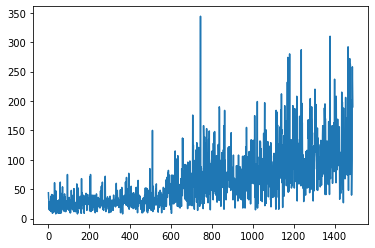

In [6]:
env = gym.make('CartPole-v1')
q_table, bins = Qtable(4, 2)
score_history = Q_learning(q_table, bins, episodes=10000, gamma=0.995, lr=0.15)
env.close()
plt.plot(score_history)
plt.show()

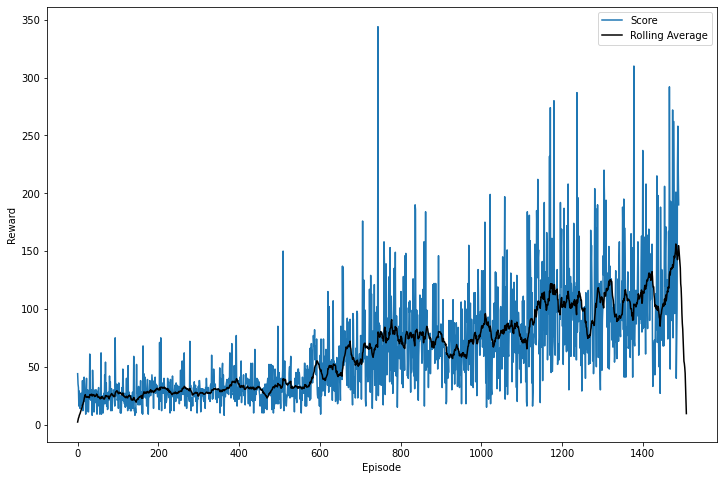

In [12]:
rolling_average = np.convolve(score_history, np.ones(20) / 20)

plt.figure(figsize=(12, 8))
plt.plot(score_history)
plt.plot(rolling_average, color='black')
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.legend(['Score', 'Rolling Average'])
plt.show()